# Bagging

Training D1_D2 dataset using the `Bagging` ensemble method.

### Author
Richard Li

In [1]:
# import libraries
import warnings
import numpy as np

warnings.filterwarnings(action='ignore')

# import custom class
from tadpole import Tadpole

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import balanced_accuracy_score, roc_auc_score, confusion_matrix

# import visualization library
from matplotlib import pyplot as plt

%matplotlib inline

### Data Loading + Preprocessing

In [2]:
# initialize class
tp = Tadpole(debug=True)

In [3]:
# load and pre-process tadpole dataset
tp.load()
print(tp.label_dict)

loading tadpole dataset
pre-processing dataset
{0: 'AD', 1: 'CN', 2: 'MCI'}


##### Split data into Train and Test datasets

In [4]:
# train-test split
tp.split()

splitting dataset to train and test datasets


In [5]:
# import variables from class instance (notebook compatibility)
label_dict = tp.label_dict
X, y, X_train, X_test, y_train, y_test = tp.X, tp.y, tp.X_train, tp.X_test, tp.y_train, tp.y_test

### Helper functions

In [6]:
def showConfusionMatrix(clf, X, y):
    cm = confusion_matrix(y, clf.predict(X))
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm, cmap='GnBu')
    ax.grid(False)

    # For 3 categories
    ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('Predicted ' + label_dict[0], 'Predicted ' + label_dict[1], 
                                              'Predicted ' + label_dict[2]))
    ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('Actual ' + label_dict[0], 'Actual ' + label_dict[1], 
                                              'Actual ' + label_dict[2]))

    for i in range(3):
        for j in range(3):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.title('Test Data Confusion Matrix')
    plt.show()

def accuracy(clf, X, y):
    y_pred = clf.predict(X)
    acc = sum(y_pred == y) / len(y)
    return acc

def metrics(clf, X, y):
    y_pred = clf.predict(X)
    y_prob = clf.predict_proba(X)
    BCA = balanced_accuracy_score(y, y_pred)
    mAUC = roc_auc_score(y, y_prob, multi_class="ovo", average="macro")
    return BCA, mAUC

In [7]:
def report_accuracy(clf):
    train_acc = accuracy(clf, X_train, y_train)
    test_acc = accuracy(clf, X_test, y_test)
    print('Train accuracy:', train_acc)
    print('Test accuracy:', test_acc)
    
def report_metrics(clf, verbose):
    BCA_train, mAUC_train = metrics(clf, X_train, y_train)
    BCA_test, mAUC_test = metrics(clf, X_test, y_test)
    
    if verbose:
        print('\tTrain metrics')    
        print('BCA_train:', BCA_train)
        print('mAUC_train:', mAUC_train)

        print('\tTest metrics')   
        print('BCA_test:', BCA_test)
        print('mAUC_test:', mAUC_test)
    
    showConfusionMatrix(clf, X_test, y_test)
    return BCA_train, BCA_test, mAUC_train, mAUC_test

Settings are not final.

In [8]:
def bagging_clf(clf):
    return BaggingClassifier(base_estimator = clf, 
                             n_estimators = 100, 
                             max_samples = 0.3, 
                             random_state = 0)

In [9]:
def evaluate(Classifier, verbose=False, **kwargs):
    if verbose: print('+ Base learner')
    clf = Classifier(**kwargs).fit(X_train, y_train)
    clf_perf = report_metrics(clf, verbose)
    
    if verbose: print('\n+ Ensemble')
    bag_clf = bagging_clf(Classifier(**kwargs)).fit(X_train, y_train)
    bag_clf_perf = report_metrics(bag_clf, verbose)
    
    # Values in dict are lists of the following format: 
    # BCA_train, BCA_test, mAUC_train, mAUC_test
    if not verbose:
        return {'clf': list(clf_perf), 'bag_clf': list(bag_clf_perf)}

In [10]:
# Make a main for every baselearner that runs them multiple times
# because SVC requires extra arguments, which makes it difficult
# to generalize into one function.

# def main(verbose=False):
#     baselearners = [DecisionTreeClassifier, 
#                     SVC, 
#                     MLPClassifier,
#                     LogisticRegression]
    
#     for learner in baselearners:           
#         if verbose:
#             print(learner)
#             evaluate(learner, True)
#             print()
#         else:
#             perf = evaluate(learner)

## Models

### DTC

+ Base learner
	Train metrics
BCA_train: 1.0
mAUC_train: 1.0
	Test metrics
BCA_test: 0.8250201408954067
mAUC_test: 0.868765105671555


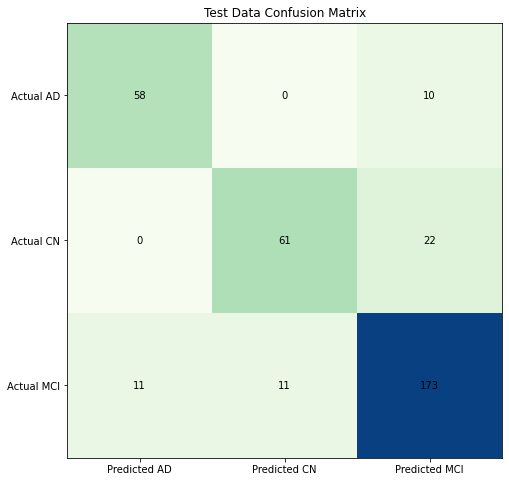


+ Ensemble
	Train metrics
BCA_train: 0.9207424721510478
mAUC_train: 0.9940903035217793
	Test metrics
BCA_test: 0.9082253599617172
mAUC_test: 0.970838254980707


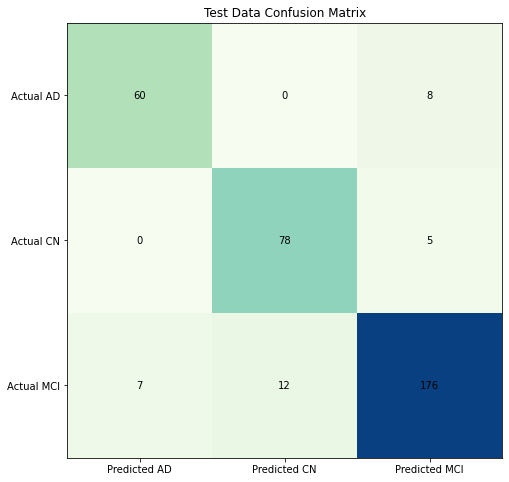

In [11]:
evaluate(DecisionTreeClassifier, True)

### SVC

+ Base learner
	Train metrics
BCA_train: 0.8742581184466373
mAUC_train: 0.9734689228255405
	Test metrics
BCA_test: 0.8875677672984548
mAUC_test: 0.9687040772441198


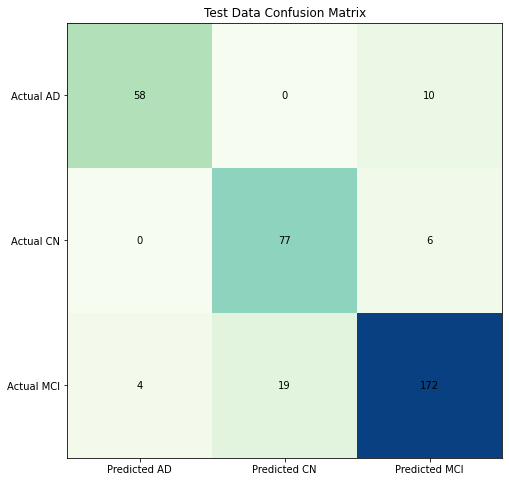


+ Ensemble
	Train metrics
BCA_train: 0.8224248426587194
mAUC_train: 0.9618717801068528
	Test metrics
BCA_test: 0.8197471636167596
mAUC_test: 0.9640189718148613


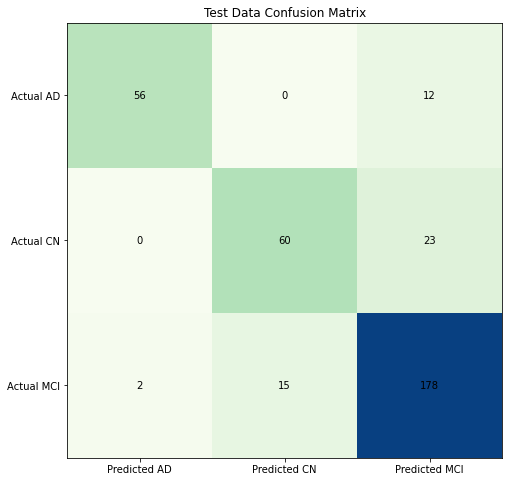

In [12]:
evaluate(SVC, True, probability=True)

### LRA

+ Base learner
	Train metrics
BCA_train: 0.8023542889506744
mAUC_train: 0.9580339457377018
	Test metrics
BCA_test: 0.8248129773997951
mAUC_test: 0.9674944120372895


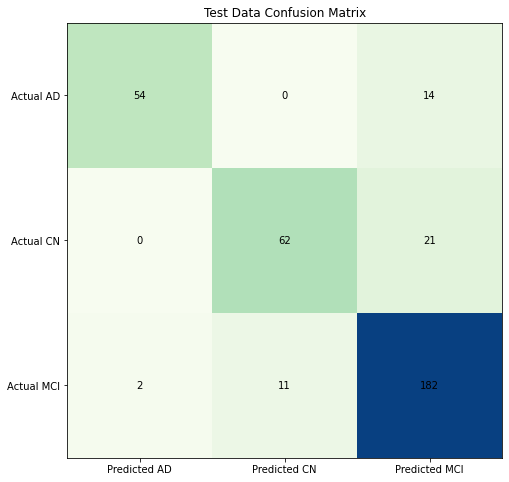


+ Ensemble
	Train metrics
BCA_train: 0.715503340662802
mAUC_train: 0.9420457565556343
	Test metrics
BCA_test: 0.7167269379175828
mAUC_test: 0.9529407221646768


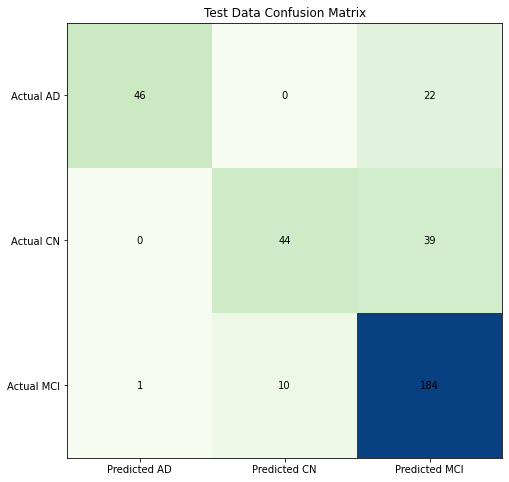

In [14]:
evaluate(LogisticRegression, True)

### ANN

+ Base learner
	Train metrics
BCA_train: 0.878439095749514
mAUC_train: 0.9726142598296655
	Test metrics
BCA_test: 0.9139508259281469
mAUC_test: 0.9757447588241351


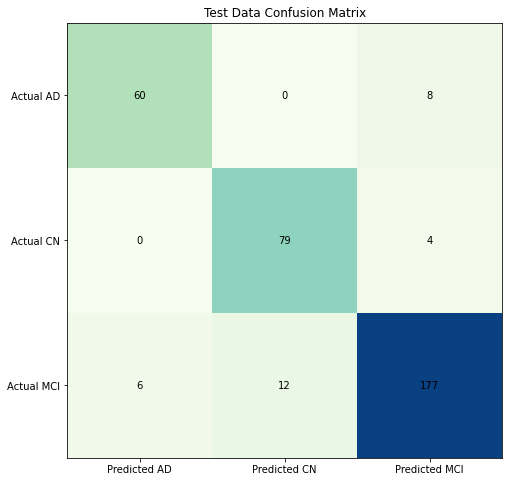


+ Ensemble
	Train metrics
BCA_train: 0.7914644248184292
mAUC_train: 0.953598822136207
	Test metrics
BCA_test: 0.8328451059138514
mAUC_test: 0.9675784586309036


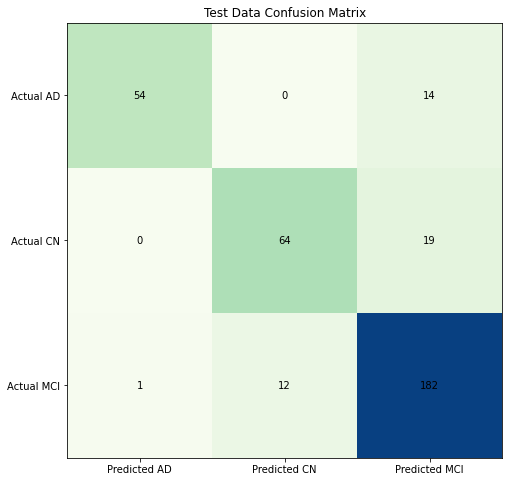

In [13]:
evaluate(MLPClassifier, True)

## Grid Search

In [2]:
from sklearn.metrics import make_scorer

from tadpole import Tadpole
from classifier import Classifier
from main import run, get_params

In [3]:
tp = Tadpole()
_ = tp.split(random_state=0)

In [4]:
bag_params = {
    'n_estimators': [10, 50, 100],
    'max_samples': np.arange(0.1, 1, 0.1)
}

In [12]:
scoring = {'BA': make_scorer(balanced_accuracy_score)}
n_jobs=8

In [6]:
def report_cv(base_learner, cv_best):
    print('Best params:', cv_best.best_params_, '\n')

    print('-'*5,'Default', '-'*5)
    clf = Classifier(BaggingClassifier(base_estimator=base_learner))
    _ = clf.fit_predict(tp.X_train, tp.y_train, tp.X_test, tp.y_test, verbose=True)

    print('\n', '-'*5,'Best', '-'*5)
    clf = Classifier(cv_best.best_estimator_)
    _ = clf.fit_predict(tp.X_train, tp.y_train, tp.X_test, tp.y_test, verbose=True)

### DTC

In [30]:
params_dtc = get_params('dtc')
dtc = DecisionTreeClassifier()
dtc.set_params(**params_dtc)
bag_dtc = BaggingClassifier(base_estimator=dtc, warm_start=True, random_state=0)

In [31]:
bag_dtc_cv = tp.gridsearch(bag_params, bag_dtc, scoring, n_jobs=n_jobs)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 135 out of 135 | elapsed:    5.8s finished


In [32]:
report_cv(dtc, bag_dtc_cv)

Best params: {'max_samples': 0.9, 'n_estimators': 100} 

----- Default -----
# Train metrics
BCA_train: 0.8416057139568833
mAUC_train: 0.9501681026519351
# Test metrics
BCA_test: 0.8819879820942896
mAUC_test: 0.963877682676407

 ----- Best -----
# Train metrics
BCA_train: 0.856944823032704
mAUC_train: 0.9526995803727732
# Test metrics
BCA_test: 0.8954369514256119
mAUC_test: 0.9615083259130035


### SVC

In [19]:
params_svc = get_params('svc')
svc = SVC(probability=True)
svc.set_params(**params_svc)
bag_svc = BaggingClassifier(base_estimator=svc, warm_start=True, random_state=0)

In [20]:
bag_svc_cv = tp.gridsearch(bag_params, bag_svc, scoring, n_jobs=n_jobs)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 135 out of 135 | elapsed:  2.4min finished


In [21]:
report_cv(svc, bag_svc_cv)

Best params: {'max_samples': 0.7000000000000001, 'n_estimators': 10} 

----- Default -----
# Train metrics
BCA_train: 0.8824961232562224
mAUC_train: 0.9700035435861092
# Test metrics
BCA_test: 0.9217567100983118
mAUC_test: 0.9751626415162914

 ----- Best -----
# Train metrics
BCA_train: 0.8760544440204256
mAUC_train: 0.9682804559111258
# Test metrics
BCA_test: 0.9234661118077135
mAUC_test: 0.9721496847116975


### LRA

In [16]:
params_lra = get_params('lra')
lra = LogisticRegression()
lra.set_params(**params_lra)
bag_lra = BaggingClassifier(base_estimator=lra, warm_start=True, random_state=0)

In [17]:
bag_lra_cv = tp.gridsearch(bag_params, bag_lra, scoring, n_jobs=n_jobs)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 135 out of 135 | elapsed:    6.2s finished


In [18]:
report_cv(lra, bag_lra_cv)

Best params: {'max_samples': 0.9, 'n_estimators': 50} 

----- Default -----
# Train metrics
BCA_train: 0.8905702750670859
mAUC_train: 0.9657406492485779
# Test metrics
BCA_test: 0.9215304657544204
mAUC_test: 0.9714730717742767

 ----- Best -----
# Train metrics
BCA_train: 0.8901429246397354
mAUC_train: 0.9660760595171031
# Test metrics
BCA_test: 0.9183379066795084
mAUC_test: 0.9723115690514698


### ANN

In [23]:
# More modest grid search for ANN
# Reason: cannot run the other parameters due to CPU reaching temperatures close to overheating due to the longer run time
bag_params_ann = {
    'n_estimators': [10, 20, 50],
    'max_samples': np.arange(0.1, 1, 0.2)
}

# Cannot run these either as the same problem remains (CPU 95+ degrees after a few minutes)

In [26]:
# Even more modest grid search for ANN
# Reason: see cell above
bag_params_ann = {
    'n_estimators': [10],
    'max_samples': np.arange(0.1, 1, 0.2)
}

In [27]:
params_ann = get_params('ann')
ann = MLPClassifier()
ann.set_params(**params_ann)
bag_ann = BaggingClassifier(base_estimator=ann, warm_start=True, random_state=0)

In [28]:
bag_ann_cv = tp.gridsearch(bag_params_ann, bag_ann, scoring, n_jobs=n_jobs)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  23 out of  25 | elapsed:   58.3s remaining:    5.0s
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:  1.1min finished


In [29]:
report_cv(ann, bag_ann_cv)

Best params: {'max_samples': 0.7000000000000001, 'n_estimators': 10} 

----- Default -----
# Train metrics
BCA_train: 0.8929642400673584
mAUC_train: 0.9804687831264727
# Test metrics
BCA_test: 0.9156602276375486
mAUC_test: 0.9771282717597388

 ----- Best -----
# Train metrics
BCA_train: 0.8847156347865065
mAUC_train: 0.9789102109796652
# Test metrics
BCA_test: 0.9108206581984044
mAUC_test: 0.9754742953715313
